In [0]:
import numpy as np
import matplotlib.pylab as plt

!wget -O Kandinsky.jpg https://i0.wp.com/www.guggenheim.org/wp-content/uploads/2012/05/art-vasily-kandinsky-2-1912.jpg?w=870&zoom=2

im = plt.imread("Kandinsky.jpg")

--2019-11-21 13:10:14--  https://i0.wp.com/www.guggenheim.org/wp-content/uploads/2012/05/art-vasily-kandinsky-2-1912.jpg?w=870
Resolving i0.wp.com (i0.wp.com)... 192.0.77.2
Connecting to i0.wp.com (i0.wp.com)|192.0.77.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 153909 (150K) [image/jpeg]
Saving to: ‘Kandinsky.jpg’

Kandinsky.jpg       100%[===================>] 150.30K  --.-KB/s    in 0.04s   

2019-11-21 13:10:14 (4.06 MB/s) - ‘Kandinsky.jpg’ saved [153909/153909]



In [0]:
im.shape

(589, 870, 3)

The first two indices represent the Y and X position of a pixel, and the third represents the RGB colour value of the pixel.

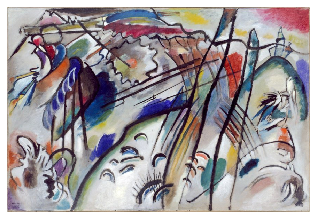

In [0]:
def plti(im, h=8, **kwargs):
    """
    Helper function to plot an image.
    """
    y = im.shape[0]
    x = im.shape[1]
    w = (y/x) * h
    plt.figure(figsize=(w,h))
    plt.imshow(im, interpolation="none", **kwargs)
    plt.axis('off')

plti(im)

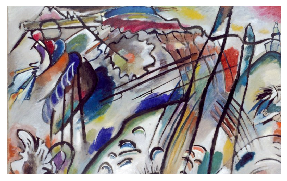

In [0]:
im = im[10:500,:800,:]    
plti(im)

##Colours

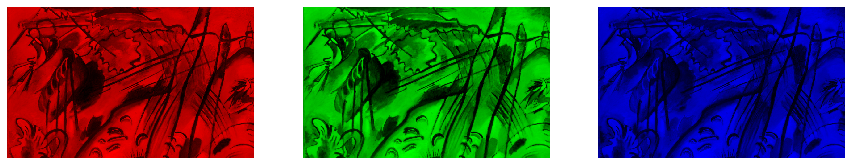

In [0]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for c, ax in zip(range(3), axs):
    tmp_im = np.zeros(im.shape, dtype="uint8")
    tmp_im[:,:,c] = im[:,:,c]
    ax.imshow(tmp_im)
    ax.set_axis_off()

##Transformations

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


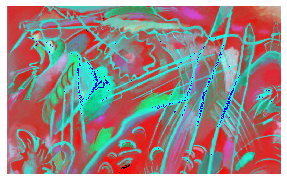

In [0]:
def do_normalise(im):
    return -np.log(1/((1 + im)/257) - 1)
 
def undo_normalise(im):
    return (1 + 1/(np.exp(-im) + 1) * 257).astype("uint8")

def rotation_matrix(theta):
    """
    3D rotation matrix around the X-axis by angle theta
    """
    return np.c_[
        [1,0,0],
        [0,np.cos(theta),-np.sin(theta)],
        [0,np.sin(theta),np.cos(theta)]
    ]

im_normed = do_normalise(im)
im_rotated = np.einsum("ijk,lk->ijl", im_normed, rotation_matrix(np.pi))
im2 = undo_normalise(im_rotated)

plti(im2)

##Animation

In [0]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(5,8))

def update(i):
    im_normed = do_normalise(im)
    im_rotated = np.einsum("ijk,lk->ijl", im_normed, rotation_matrix(i * np.pi/10))
    im2 = undo_normalise(im_rotated)
    
    ax.imshow(im2)
    ax.set_title("Angle: {}*pi/10".format(i), fontsize=20)
    ax.set_axis_off()


anim = FuncAnimation(fig, update, frames=np.arange(0, 20), interval=50)
anim.save('colour_rotation.gif', dpi=80, writer='imagemagick')
plt.close()

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


On the topic of colour, we can also transform the image to greyscale easily. There are a number of ways to do this, but a straight forward way is to take the weighted mean of the RGB value of original image.

In [0]:
def to_grayscale(im, weights = np.c_[0.2989, 0.5870, 0.1140]):
    """
    Transforms a colour image to a greyscale image by
    taking the mean of the RGB values, weighted
    by the matrix weights
    """
    tile = np.tile(weights, reps=(im.shape[0],im.shape[1],1))
    return np.sum(tile * im, axis=2)

In [0]:
img = to_grayscale(im)
img.shape
#plti(img, cmap='Greys')

(490, 800)

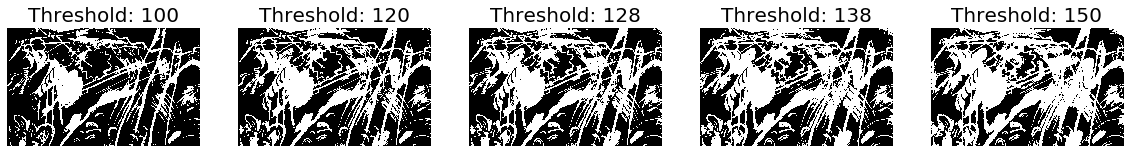

In [0]:
def simple_threshold(im, threshold=128):
    return ((im > threshold) * 255).astype("uint8")

thresholds = [100,120,128,138,150]

fig, axs = plt.subplots(nrows=1, ncols=len(thresholds), figsize=(20,5));
gray_im = to_grayscale(im)
                        
for t, ax in zip(thresholds, axs):
    ax.imshow(simple_threshold(gray_im, t), cmap='Greys');
    ax.set_title("Threshold: {}".format(t), fontsize=20);
    ax.set_axis_off();